---
# Análise Exploratória de Dados do Dataset Microdados Enem 2021
---

### Objetivo do Estudo

Estaremos trabalhando com informações de microdados do Enem realizado em 2021. Temos como objetivo avaliar dados demográficos, indicadores sociais e financeiros e descobrir se correlacionam com as pontuações obtidas pelos candidatos.

#### 1.0 - Importando bibliotecas importantes

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

%matplotlib inline

import plotly.express as px
from IPython.core.pylabtools import figsize
from string import ascii_uppercase

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### 2.0 - Selecionando os dados

In [2]:
enem_df = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=';', encoding = "ISO-8859-1", chunksize=1000000)
enem_df = pd.concat(enem_df, ignore_index=True)

enem_df.head()


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.00,892.00,NaN,NaN,574.60,472.60,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.00,882.00,891.00,901.00,505.90,551.80,498.30,461.50,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,2304202.00,Crato,23.00,CE,2.00,1.00,1.00,2304202,Crato,23,CE,1,1,1,1,911.00,880.00,890.00,902.00,580.70,678.90,638.90,659.50,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,2311603.00,Redenção,23.00,CE,2.00,1.00,1.00,2300150,Acarape,23,CE,1,1,1,1,912.00,882.00,891.00,901.00,497.70,532.40,457.60,582.60,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


Tamanho do DataFrame:

In [3]:
enem_df.shape

(3389832, 76)

Visualizando os tipos de dados

In [4]:
enem_df.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

#### 3.0 - Selecionando colunas importantes

In [5]:
print(list(enem_df.columns))

['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 

In [6]:
sel_col= ["NU_INSCRICAO","TP_SEXO","TP_FAIXA_ETARIA", "TP_COR_RACA", "NO_MUNICIPIO_ESC","SG_UF_PROVA", "TP_ESCOLA", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO", "TP_LINGUA",
           "Q001","Q002","Q005","Q006", "Q025"]
enem_df2 = enem_df[sel_col]
enem_df2 = enem_df2.rename(columns={'Q001': 'EDU_PAI', "Q002":"EDU_MAE","Q005":"POP_RES","Q006":"RENDA_FAM","Q025 ":"INTERNET"})
enem_df2.head()

,NU_INSCRICAO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,NO_MUNICIPIO_ESC,SG_UF_PROVA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_LINGUA,EDU_PAI,EDU_MAE,POP_RES,RENDA_FAM,Q025
0,210053865474,F,5,1,NaN,MG,1,NaN,574.60,472.60,NaN,760.00,1,F,F,3.00,D,B
1,210052384164,M,12,1,NaN,AL,1,505.90,551.80,498.30,461.50,560.00,1,B,B,3.00,B,A
2,210052589243,F,13,1,NaN,SP,1,NaN,NaN,NaN,NaN,NaN,1,B,C,3.00,C,B
3,210052128335,M,3,3,Crato,CE,2,580.70,678.90,638.90,659.50,780.00,0,B,B,6.00,B,B
4,210051353021,F,2,3,Redenção,CE,2,497.70,532.40,457.60,582.60,780.00,1,D,E,4.00,C,B


In [7]:
enem_df2.shape

(3389832, 18)

#### 4.0 - Filtrando apenas candidatos que tenham feito todas as provas

In [8]:
enem_df2 = enem_df2.dropna() # só nas colunas das provas
# Criando uma coluna contendo a média das notas dos candidatos
enem_df2["NOTA_MEDIA"] = (enem_df2["NU_NOTA_CN"] + enem_df2["NU_NOTA_CH"] + enem_df2["NU_NOTA_LC"] + enem_df2["NU_NOTA_MT"])
enem_df2.head()

,NU_INSCRICAO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,NO_MUNICIPIO_ESC,SG_UF_PROVA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_LINGUA,EDU_PAI,EDU_MAE,POP_RES,RENDA_FAM,Q025,NOTA_MEDIA
3,210052128335,M,3,3,Crato,CE,2,580.70,678.90,638.90,659.50,780.00,0,B,B,6.00,B,B,2558.00
4,210051353021,F,2,3,Redenção,CE,2,497.70,532.40,457.60,582.60,780.00,1,D,E,4.00,C,B,2070.30
33,210053085526,M,3,1,Urandi,BA,2,414.60,410.10,386.70,423.00,700.00,0,C,C,6.00,B,B,1634.40
45,210052916275,F,4,3,Montanha,ES,2,476.80,608.50,534.20,570.20,640.00,1,H,E,4.00,C,B,2189.70
51,210051417174,M,3,3,São Mateus,ES,2,433.40,622.00,548.30,579.40,680.00,1,E,F,4.00,D,B,2183.10


#### 5.0 - Visualizando Dados

#### Visão sobre gênero

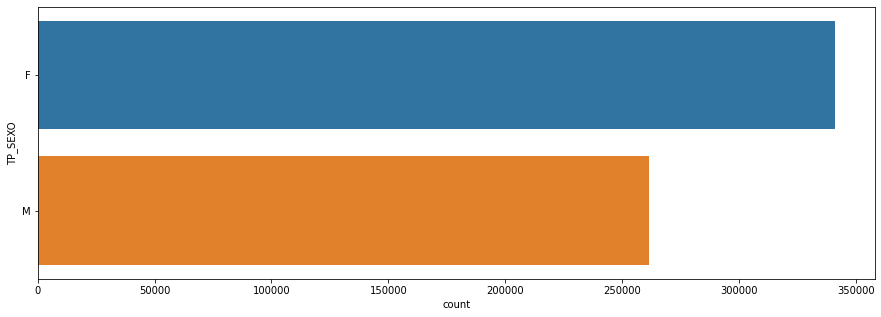

In [9]:
# Contagem de candidatos do sexo masculino e feminino
plt.figure(figsize = (15,5))
gender_count = enem_df2.groupby("TP_SEXO").describe()["NU_INSCRICAO"]["count"].reset_index()
sns.barplot(data = gender_count, x = "count", y = "TP_SEXO", orient = "h");

#### Gráfico visualizando em quais estados temos mais candidatos

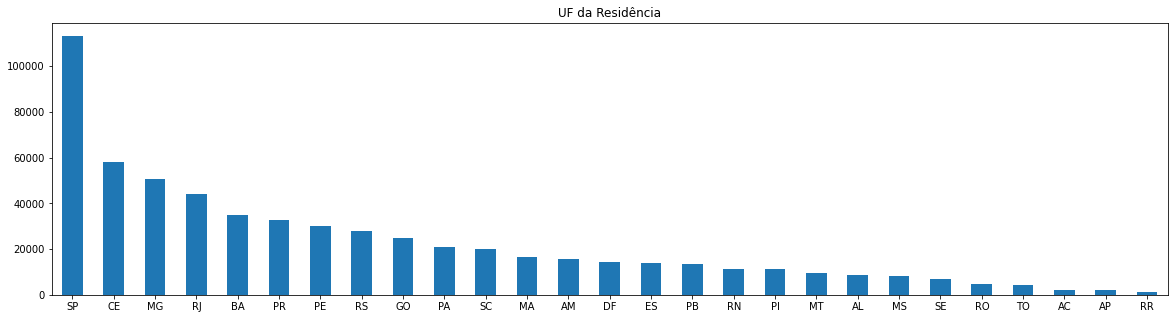

In [23]:
enem_df2['SG_UF_PROVA'].value_counts().plot(title='UF da Residência',kind='bar', figsize=(20,5), rot=0);

#### Visão sobre faixa etária dos candidatos

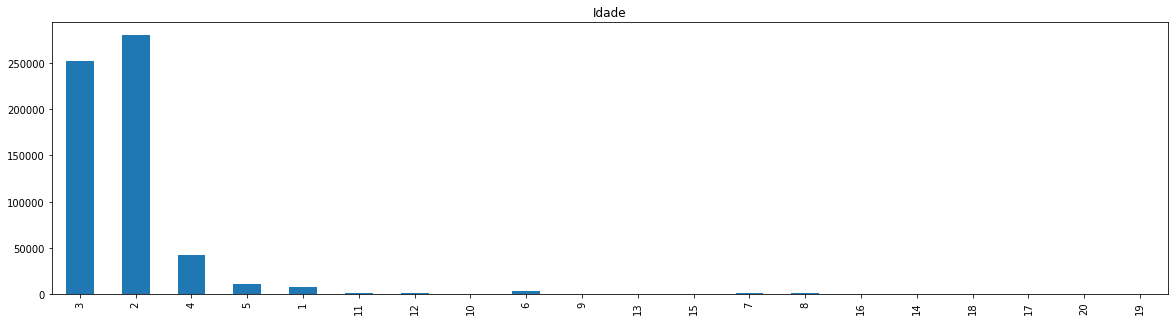

In [28]:
data_idade = enem_df2['TP_FAIXA_ETARIA'].value_counts(sort=False).plot(title='Idade',kind='bar', figsize=(20,5))

LEGENDA:  
- 1: MENOR QUE 17 ANOS
- 2: 17 ANOS
- 3: 18 ANOS
- 4: 19 ANOS
- 5: 20 ANOS
- 6: 21 ANOS
- 7: 22 ANOS
- 8: 23 ANOS
- 11: ENTRE 26 E 30 ANOS
- 12: ENTRE 31 E 35 ANOS

#### Visão sobre raça

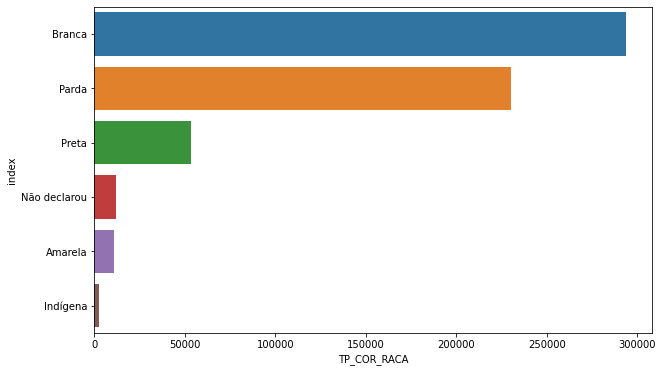

In [12]:
data_raca = enem_df2['TP_COR_RACA'].value_counts()
data_raca = data_raca.rename(index = {0:"Não declarou", 1:"Branca", 2:"Preta",3:"Parda" , 4:"Amarela", 5:"Indígena"}).reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = data_raca, x = "TP_COR_RACA", y = "index", orient = "h");

#### Descobrindo a relação entre o tipo de escola com a nota média dos candidatos

In [34]:
media_escola = enem_df2.groupby("TP_ESCOLA").describe()["NOTA_MEDIA"]["mean"]
media_escola = media_escola.iloc[[0,1]]
media_escola = media_escola.rename(index = {2:"Publica", 3:"Privada"}).reset_index()
media_escola


,TP_ESCOLA,mean
0,Publica,1988.02
1,Privada,2280.42


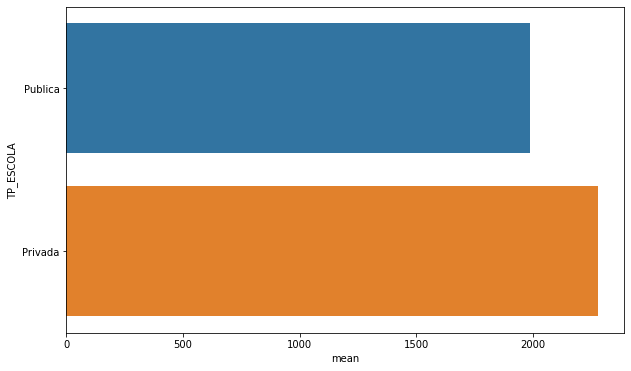

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(data = media_escola, x = "mean", y = "TP_ESCOLA", orient = "h",);

c:\Users\jgabrielmelo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jgabrielmelo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


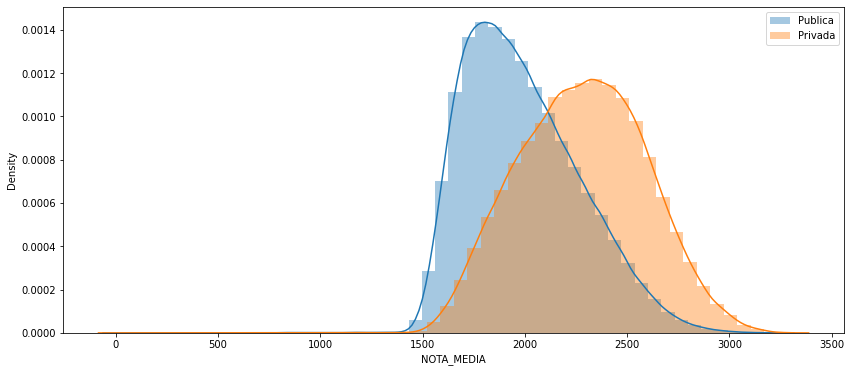

In [15]:
plt.figure(figsize = (14,6))
nota_pub = enem_df2[enem_df2["TP_ESCOLA"] == 2]["NOTA_MEDIA"]
nota_priv = enem_df2[enem_df2["TP_ESCOLA"] == 3]["NOTA_MEDIA"]
sns.distplot(nota_pub, label = "Publica");
sns.distplot(nota_priv, label = "Privada");
plt.legend();

#### Descobrindo a relação do gênero com a nota média dos candidatos

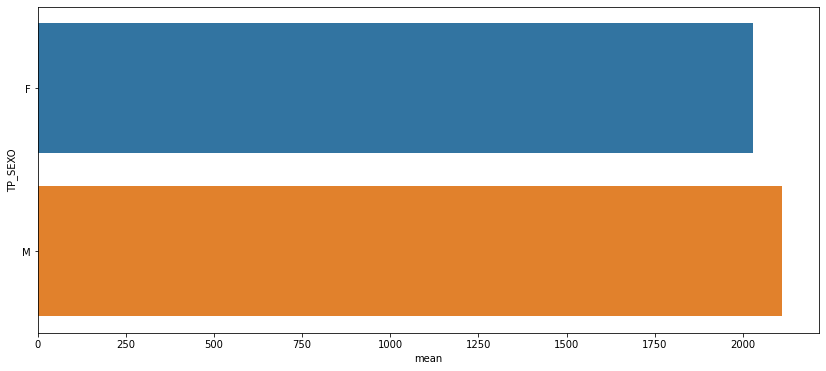

In [16]:
plt.figure(figsize = (14,6))
nota_genero = enem_df2.groupby("TP_SEXO").describe()["NOTA_MEDIA"]["mean"].reset_index()
sns.barplot(data = nota_genero, x = "mean", y = "TP_SEXO", orient = "h",);

c:\Users\jgabrielmelo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jgabrielmelo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


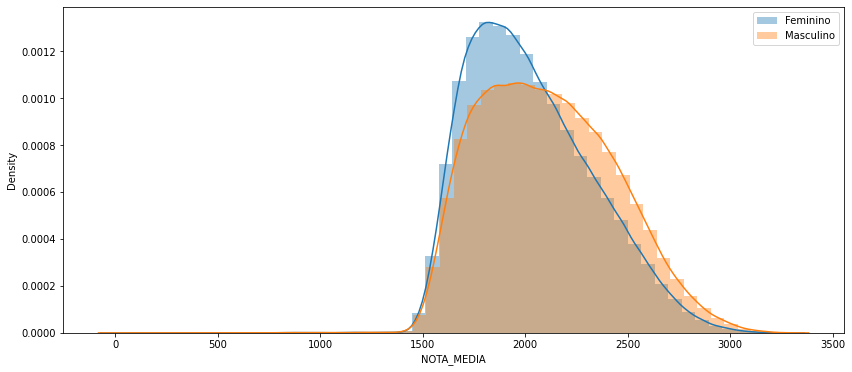

In [17]:
plt.figure(figsize = (14,6))
nota_fem = enem_df2[enem_df2["TP_SEXO"] == "F"]["NOTA_MEDIA"]
nota_masc = enem_df2[enem_df2["TP_SEXO"] == "M"]["NOTA_MEDIA"]
sns.distplot(nota_fem, label = "Feminino");
sns.distplot(nota_masc, label = "Masculino");
plt.legend();

#### Descobrindo a relação entre o estado do candidato e as maiores notas do ENEM

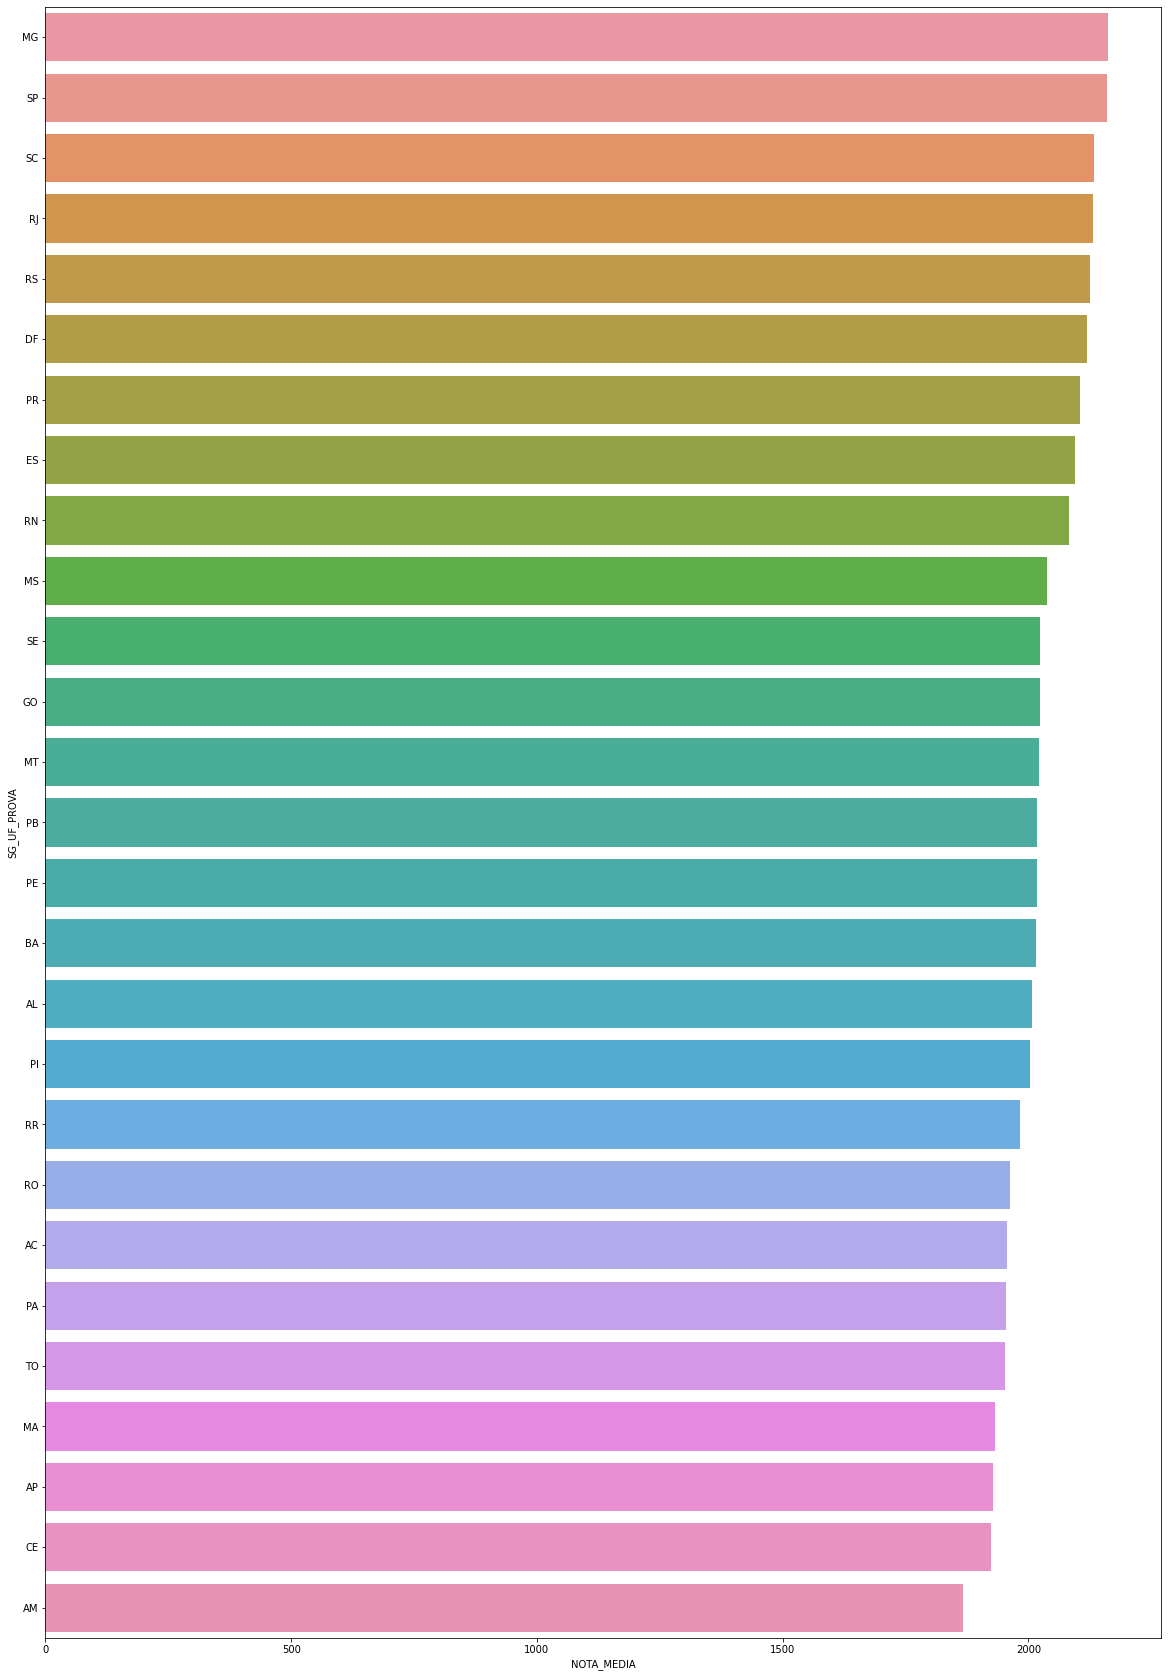

In [18]:
plt.figure(figsize = (20,30))
nota_estado = enem_df2.groupby("SG_UF_PROVA").mean()["NOTA_MEDIA"].reset_index().sort_values(by="NOTA_MEDIA", ascending = False)
sns.barplot(data = nota_estado, x = "NOTA_MEDIA", y = "SG_UF_PROVA", orient = "h");

#### Descobrindo a relação entre maiores notas e a raça declarada

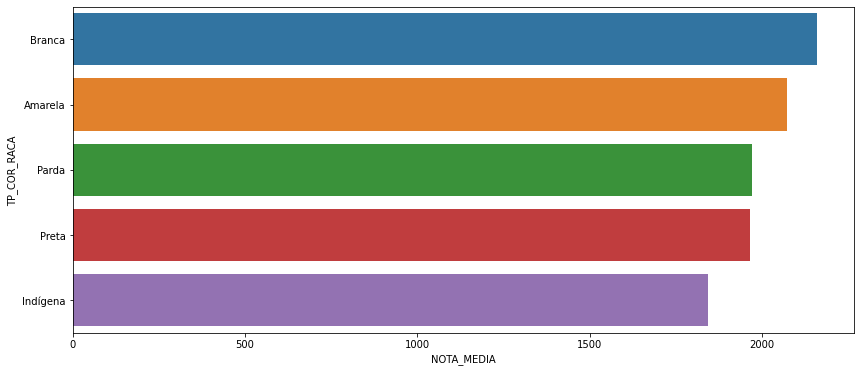

In [19]:
plt.figure(figsize = (14,6))
nota_raca = enem_df2.groupby("TP_COR_RACA").mean()["NOTA_MEDIA"]
nota_raca = nota_raca.rename(index = {0:"Não declarou", 1:"Branca", 2:"Preta",3:"Parda" , 4:"Amarela", 5:"Indígena"}).reset_index()
nota_raca = nota_raca[1:].sort_values(by = "NOTA_MEDIA", ascending = False)
sns.barplot(data = nota_raca,x = "NOTA_MEDIA" , y = "TP_COR_RACA", orient = "h");

# Conclusões

Depois de analisarmos os dados, podemos tirar algumas conclusões sobre os candidatos e/ou as notas do ENEM 2021:
- Maior participação de candidatas do sexo feminino no exame.
- Maior participação de candidatos do estado de SP.
- Maioria dos candidatos tem entre 17 e 18 anos.
- Maior relação de candidatos se autodeclarando da cor branca.
- Candidatos de escola privada tiveram uma maior média de nota.
- A nota média dos candidatos masculinos foram superiores.
- O estado de Minas Gerais possui a maior média de notas do ENEM.
- Podemos ver que os candidatos que se declararam da raça branca possuíram maior nota média.